In [ ]:
#PAQUETES
import pandas as pd
from google.colab import drive
import time

In [ ]:
### LECTURA
drive.mount('/content/drive')
file = open('/content/drive/MyDrive/HUM/muestra_ejemplos_APA_02_03_23.txt', 'r')
next(file) #eliminamos cabecera
data = file.read() #string

Mounted at /content/drive


In [ ]:
### ID
# Creación de una lista con cada ID del informe
data2 = data.splitlines() #lista con cada linea. Separador por la izda
data3 = []
for i in data2:
  l = i.split("|") #Separador por la dcha
  for j in l:
    data3.append(j)
id=[]
for i in data3:
  if len(i) > 10 and not ' ' in i:
    id.append(i)

In [ ]:
### DIAGNOSTICOS

# Creación de una lista con cada diagnóstico del informe

diag = data.split("|") #separacion por la dcha e izda

for i in diag:
  if len(i) > 10 and not ' ' in i:
    diag.remove(i) #eliminacion de id del informe

for j in diag:
  if j == '' or j=='S':
    diag.remove(j) #eliminacion de checks del informe

for i in diag:
  if i == '':
    diag.remove(i) #eliminacion espacios en blanco del informe


In [ ]:
### CHECKS
# Creación de dos listas por cada check del informe
# 0 check desactivado
# 1 check activado

data = data.replace('|S|S','|s|S')
data = data.replace('||S','|s|S')
data = data.splitlines() #lista con cada linea

cc=[] #conservar
cr=[] #registro

for i in data:
  if "|S|" in i:
    cr.append(1)
    cc.append(0)
  elif "|s|S" in i:
    cr.append(1)
    cc.append(1)
  elif "||" in i:
    cr.append(0)
    cc.append(0)

In [ ]:
### PALABRAS CLAVE
# Creación de una lista si existe palabra clave
# 0 no hay palabra clave
# 1 hay palabra clave

inicio = time.time() #medición del tiempo

#lista de palabras clave
diagnostico = ["carcinoma", "Carcinoma", "adenocarcinoma","Adenocarcinoma", "melanoma", "Melanoma", "linfoma", "Linfoma", "tumor neuroendocrino", "Tumor neuroendocrino", "positivo", "Positivo", "carcinoide", "Carcinoide", 
               "neoplasia", "Neoplasia", "mielodisplásico", "Mielodisplásico", "mieloproliferativo", "Mieloproliferativo", "mieloma", "Mieloma", "sarcoma", "Sarcoma", "micosis fungoide", "Micosis fungoide", "angiosarcoma", "Angiosarcoma", 
               "liposarcoma", "Liposarcoma", "leucemia", "Leucemia", "cistoadenocarcinoma", "Cistoadenocarcinoma", "colangiocarcinoma", "Colangiocarcinoma", "lentigo maligno", "Lentigo maligno", "fibroxantoma", "Fibroxantoma"]

#lista de excepciones
excepciones=['carcinoma basocelular', 'Carcinoma basocelular']

palabra=[]
pal=[] #lista con la palabras encontradas


c=0 #encuentra coincidencia
p=0 #encuentra excepcion

for i in diag:
  c=0
  p=0
  for j in diagnostico:
    for l in excepciones:
      if l in i:
        p=1 #encuentra excepcion
    if j in i and p==0: #encuentra coincidencia y no existe excepcion
      pal.append(j)
      c=1 #encuentra coincidencia
    else:
      pal.append('')
  if c==1:
    palabra.append(1)

  else:
    palabra.append(0) 

fin = time.time()
print('Tiempo total de ejecución =', fin-inicio, 's')

Tiempo total de ejecución = 0.00799107551574707 s


In [ ]:
#LÓGICA COMBINACIONAL
# Creación de una lista por candidato a envío de alerta
# 0 no envío alerta
# 1 envío alerta


alerta=[]
for i in range(len(id)):
  if (cc[i] == 1) and (cr[i] == 1) and (palabra[i] == 1):
    alerta.append(1)
  elif (cc[i] == 0) and (cr[i] == 0) and (palabra[i] == 1):
    alerta.append(1)
  elif (cc[i] == 1) and (cr[i] == 0) and (palabra[i] == 1):
    alerta.append(1)
  else:
    alerta.append(0)

In [ ]:
#TABLA ID, CHECKS, PALABRA Y ALERTA
tabla = pd.DataFrame()

tabla["estudio"] = id
tabla["tumor"] = cr
tabla["conservar"] = cc
tabla["palabra"] = palabra
tabla["alerta"] = alerta
tabla.style

,estudio,tumor,conservar,palabra,alerta
0,GMmJ+3aMuBP+oWv62DHSTQ==,0,0,0,0
1,es6IS6wYxGmsQDamzK83ng==,0,0,0,0
2,lWPyenedUkdIOUkvroir2A==,0,0,0,0
3,lWPyenedUkdIOUkvroir2A==,0,0,0,0
4,lUGlVUMXiigaMjahgnSv4w==,0,0,0,0
5,lUGlVUMXiigaMjahgnSv4w==,0,0,0,0
6,c1iA/1MOSmEwqqwQbzi2yw==,0,0,0,0
7,1a60QY6ZaLAhT1v7lLRVkg==,0,0,0,0
8,BQqEEwrZ6F003xwQKHL04g==,0,0,0,0
9,mFjttk0lqrnaw+8KdeTesA==,0,0,0,0


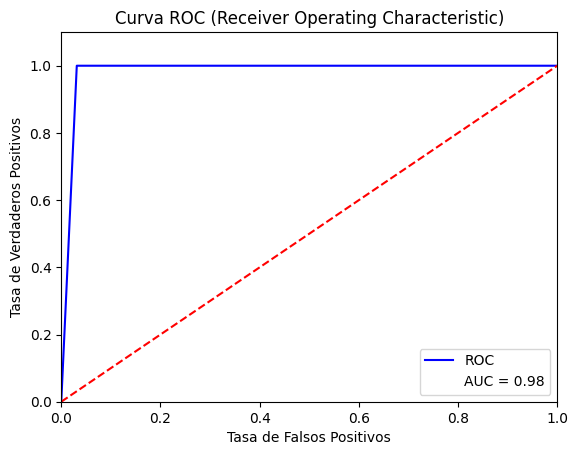

In [ ]:
# Curva ROC y Área Bajo la Curva (AUC)
# Importamos paquetes
from sklearn import metrics
import matplotlib.pyplot as plt

true = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0]

# Generamos la curva ROC
fpr, tpr, threshold = metrics.roc_curve(true, alerta, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# Graficamos
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label = 'ROC')
plt.plot([], [], ' ', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlabel('Tasa de Falsos Positivos')
plt.show()